<a href="https://colab.research.google.com/github/XSiddhSaraf/100DaysOfCode/blob/main/Your_Notebook_23_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Write your comments here (or copy paste from the pdfs we distribute).



The first simple example is a LR with Scikit Learn from https://github.com/ageron/handson-ml3/blob/main/01_the_machine_learning_landscape.ipynb


In [ ]:
import sys
assert sys.version_info >= (3, 7)


In [ ]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import numpy as np
np.random.seed(42)

## Code example 1: Simple linear regression with Scikit Learn

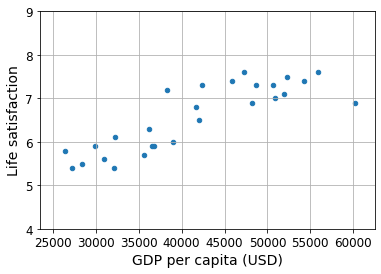

[[6.30165767]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new)) # outputs [[6.30165767]]

In [ ]:
from pathlib import Path

# Where to save the figures
IMAGES_PATH = Path() / "images" / "fundamentals"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


import urllib.request

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)


oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


##  Implementing Neural Networks in Keras

In [ ]:
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

We can specify a feedforward neural network
$f \in
\mathcal{N}_{3}(2,100,100,1;ReLU,ReLU,Id)$,
say, using the Sequential model of Keras by:



In [ ]:
f = keras.Sequential([
    keras.layers.InputLayer(input_shape=(2,)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="linear")
])

An alternative, but equivalent, way of doing the same using the add method is:

In [ ]:
f = keras.Sequential()
f.add(keras.layers.InputLayer(input_shape=(2,)))
f.add(keras.layers.Dense(100, activation="relu"))
f.add(keras.layers.Dense(100, activation="relu"))
f.add(keras.layers.Dense(1, activation="linear"))

The summary method lets us summarise the specified architecture of the network
$f$ and its parameters.

In [ ]:
f.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,501
Trainable params: 10,501
Non-trainable params: 0
_________________________________________________________________


We can also visualise the architecture using the function $\quad \texttt{plot_model} \quad$ in $\quad \texttt{keras.utils}.\quad$
(Which is particularly helpful when we have built a model with complicated routings.)

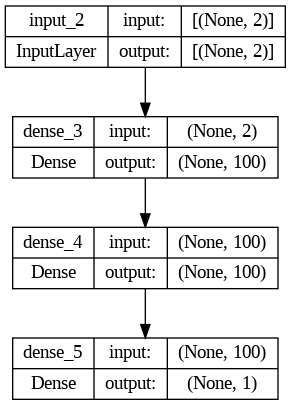

In [ ]:
keras.utils.plot_model(f, show_shapes=True)

We can remove the final layer of the network using the $\quad \texttt{pop}\quad$ method:

In [ ]:
f.pop()

We should then get $f\in \mathcal{N}_2(2,100,100; ReLu,ReLU)$, which we can verify usung (again) the $\quad \texttt{summary}\quad$ method

In [ ]:
f.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
Total params: 10,400
Trainable params: 10,400
Non-trainable params: 0
_________________________________________________________________


Let us however add the deleted layer back to the network $f$:

In [ ]:
f.add(keras.layers.Dense(1, activation="linear"))

We can study the layers of the network using the get_layer method. If we are, for example, interested in extracting the layer $$L_1(x)=W^1x+b^1, \ x \in \mathbb{R}^2,$$ we can do it as follows (remember that in Python indexation starts from zero):

In [ ]:
L_1 = f.get_layer(index=0)

We can inspect the weight matrix $W^1$ and bias vector $b^1$ using the $\quad  \texttt{get_weights} \quad $ method.

In [ ]:
print(L_1.get_weights())

[array([[-0.16017449, -0.05760607, -0.11219656, -0.02049994,  0.16268057,
        -0.09621432,  0.22850427,  0.19563532, -0.23410988, -0.09411696,
        -0.14842284, -0.10762937, -0.14699364, -0.21685179,  0.21281558,
        -0.02379835,  0.16911238,  0.18737209, -0.0414094 , -0.2202294 ,
        -0.04227643, -0.1755438 ,  0.13355407,  0.10129383,  0.091645  ,
        -0.01571985,  0.07915437,  0.11655727, -0.03969218, -0.01193491,
        -0.03444207,  0.01285657, -0.02589433,  0.14184356, -0.20828159,
        -0.03697874,  0.14918295, -0.18919252,  0.2329143 , -0.10368739,
        -0.05602039,  0.08187205,  0.23900321, -0.15664983, -0.21326831,
        -0.05071114,  0.21050063, -0.21529849,  0.22974917,  0.12260836,
        -0.17862621,  0.0383392 , -0.19788975, -0.20473906, -0.13960452,
        -0.03145067,  0.19903931, -0.06849891, -0.20909768, -0.19920024,
        -0.15125215, -0.06052612, -0.04076189,  0.12386745, -0.16029216,
        -0.02707933, -0.01547328, -0.13449621,  0.

Note that we have **not** trained $f$ yet, so $W^1 \in \mathbb{R}^{100\times 2}$ and $b^1 \in \mathbb{R}^{100}$ are at their **initializer** values. By default, **Keras** uses the random $\textit{Glorot}$ initializer for weights  and just zeros for biases. We could also specify weights manually using the $\quad \texttt{set_weights} \quad$ method.

The method $\quad \texttt{predict}\quad $ lets us compute  $f(x)$ for given input $x\in \mathbb{R}^2$. The method expects here the input in the shape $(N,2)$, where $N$ is the number of different values of $x$ for which we want $f(x)$ to be computed. $\quad$ Let us just take  $N=1$  and try with  $x(1,0)$.

In [ ]:
print(f.predict(np.reshape((1,0), (1,2))))

1/1 [==============================] - 0s 86ms/step
[[0.0298596]]


To gain some insight into what an untrained ReLU network looks like, let us use predict to plot $f(x,1)$ for $x\in [-1,1]$.

63/63 [==============================] - 0s 919us/step


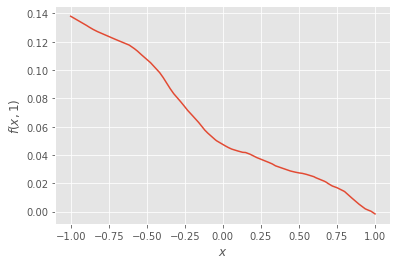

In [ ]:
x_grid = np.linspace(-1, 1, num=2001)
x_ones = np.ones((2001, ))
xb = np.stack((x_grid, x_ones), -1)
y_out = f.predict(xb)
plt.plot(x_grid, y_out)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x,1)$")
plt.show()

To prepare $f$ for training, we can use the compile method to specify the loss function $\textit{l}$ and the optimisation method. For example, we can set
$\textit{l}$ to be squared loss to be optimised with Adam.

In [ ]:
f.compile(optimizer="adam", loss="mean_squared_error")

We will learn about other possible choices of loss functions and optimizers and their respective advantages/disadvantages for our modelling objectives the next session.

# Session 3

In [ ]:
import numpy as np
import numpy.random as npr
import tensorflow.keras as keras
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
a = 10
def g(x):
    return np.cos(a*x)

We generate the data for $N=1000000$ samples

In [ ]:
npr.seed(12345)
N = 1000000
var = 0.1
x = npr.uniform(0,1, (N,1))
eps = npr.normal(0, np.sqrt(var), (N,1))
y = g(x)+eps

We plot the first 1000 samples

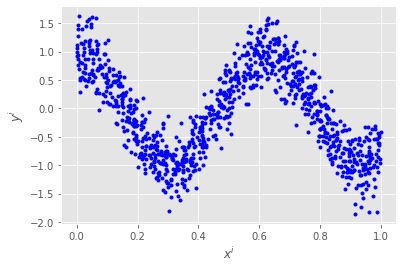

In [ ]:
N_sub = 1000
plt.plot(x[0:N_sub,], y[0:N_sub,], "bo", markersize=3)
plt.xlabel(r"$x^i$")
plt.ylabel(r"$y^i$")
plt.show()

We specify the network in Keras (as in last lecture) and inspect the specification

In [ ]:
g_hat = keras.Sequential([
    keras.layers.InputLayer(input_shape=(1,)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="linear")
]
)
g_hat.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


We compile $\hat{g}$ so that it will be trained using SGD (Adam) to minimise squared loss

In [ ]:
g_hat.compile(optimizer="adam", loss="mean_squared_error")

Then we are ready to train $\hat{g}$ with minibatches of size 100 over 5 epochs

In [ ]:
train = g_hat.fit(x, y, batch_size=100, epochs=5)

Epoch 1/5
10000/10000 [==============================] - 31s 3ms/step - loss: 0.1122
Epoch 2/5
10000/10000 [==============================] - 29s 3ms/step - loss: 0.1026
Epoch 3/5
10000/10000 [==============================] - 30s 3ms/step - loss: 0.1022
Epoch 4/5
10000/10000 [==============================] - 39s 4ms/step - loss: 0.1019
Epoch 5/5
10000/10000 [==============================] - 34s 3ms/step - loss: 0.1019


We stored the training history into an object called train,

from which we can extract and plot training loss for each epoch.

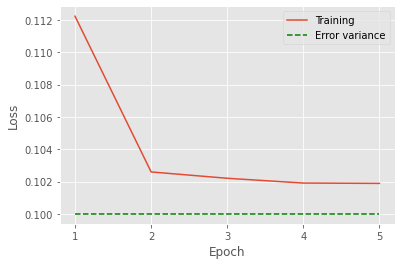

In [ ]:
plt.plot(np.arange(1, 6), train.history["loss"], label="Training")
plt.plot([1,5], [var,var], "g--", label="Error variance")
plt.xticks(np.arange(1, 6))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Let us compare $g$ with $\hat{g}$.

32/32 [==============================] - 0s 2ms/step


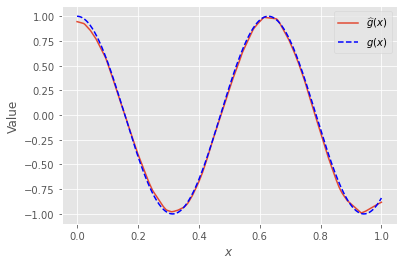

In [ ]:
x_grid = np.linspace(0, 1, num=1001)
y_hat = g_hat.predict(x_grid)
g_grid = g(x_grid)
plt.plot(x_grid, y_hat, label=r"$\widehat{g}(x)$")
plt.plot(x_grid, g_grid, "b--", label="$g(x)$")
plt.xlabel("$x$")
plt.ylabel("Value")
plt.legend()
plt.show()

The function is not so hard to learn when we have $N=1,000,000$ samples!

To demonstrate the potential problem of $\textbf{overfitting}$ we make the problem harder:

We will now only use the first 200 samples (divided into training set and test set).

In [ ]:
N_small = 200
x_sub = x[0:N_small]
y_sub = y[0:N_small]

In [ ]:
g_hat_small = keras.Sequential([
    keras.layers.InputLayer(input_shape=(1,)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="linear")
]
)
#g_hat.summary()

In [ ]:
g_hat_small.compile(optimizer="adam", loss="mean_squared_error")
train = g_hat_small.fit(x_sub, y_sub, batch_size=100, epochs=500, validation_split=0.5)

Epoch 1/500
1/1 [==============================] - 1s 890ms/step - loss: 0.6239 - val_loss: 0.5512
Epoch 2/500
1/1 [==============================] - 0s 42ms/step - loss: 0.6167 - val_loss: 0.5484
Epoch 3/500
1/1 [==============================] - 0s 43ms/step - loss: 0.6141 - val_loss: 0.5475
Epoch 4/500
1/1 [==============================] - 0s 42ms/step - loss: 0.6137 - val_loss: 0.5468
Epoch 5/500
1/1 [==============================] - 0s 39ms/step - loss: 0.6136 - val_loss: 0.5456
Epoch 6/500
1/1 [==============================] - 0s 46ms/step - loss: 0.6129 - val_loss: 0.5441
Epoch 7/500
1/1 [==============================] - 0s 38ms/step - loss: 0.6118 - val_loss: 0.5428
Epoch 8/500
1/1 [==============================] - 0s 40ms/step - loss: 0.6107 - val_loss: 0.5419
Epoch 9/500
1/1 [==============================] - 0s 58ms/step - loss: 0.6101 - val_loss: 0.5412
Epoch 10/500
1/1 [==============================] - 0s 37ms/step - loss: 0.6095 - val_loss: 0.5407
Epoch 11/500
1/1 [

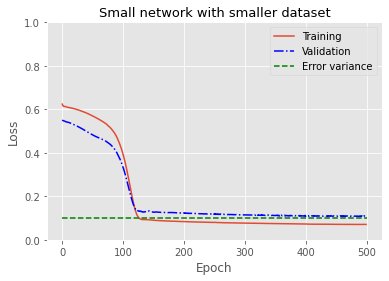

In [ ]:
plt.plot(train.history["loss"], label="Training")
plt.plot(train.history["val_loss"], "b-.", label="Validation")
plt.plot([0,500], [var,var], "g--", label="Error variance")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Small network with smaller dataset", loc='center', fontsize=13)
plt.ylim(0,1)
plt.legend()
plt.show()

32/32 [==============================] - 0s 2ms/step


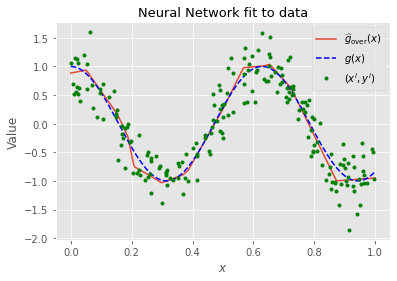

In [ ]:
y_hat_small = g_hat_small.predict(x_grid)
plt.plot(x_grid, y_hat_small, label=r"$\widehat{g}_{\mathrm{small}}(x)$")
plt.plot(x_grid, g_grid, "b--", label="$g(x)$")
plt.plot(x_sub, y_sub, "go", markersize=3, label="$(x^i,y^i)$")
plt.xlabel("$x$")
plt.ylabel("Value")
plt.title("Neural Network fit to data", loc='center', fontsize=13)
plt.legend()
plt.show()

And we specify a blatantly overparametrised network.

In [ ]:
g_hat_over = keras.Sequential([
    keras.layers.InputLayer(input_shape=(1,)),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1, activation="linear")
]
)
g_hat_over.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              2000      
                                                                 
 dense_9 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_10 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_11 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 2,005,001
Trainable params: 2,005,001
Non-trainable params: 0
_________________________________________________________________


We train it with Adam using full batches over 500 epochs.

In [ ]:
g_hat_over.compile(optimizer="adam", loss="mean_squared_error")
train = g_hat_over.fit(x_sub, y_sub, batch_size=100, epochs=500, validation_split=0.5)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.6340 - val_loss: 0.5601
Epoch 2/500
1/1 [==============================] - 0s 94ms/step - loss: 0.6290 - val_loss: 0.5474
Epoch 3/500
1/1 [==============================] - 0s 86ms/step - loss: 0.6144 - val_loss: 0.5483
Epoch 4/500
1/1 [==============================] - 0s 90ms/step - loss: 0.6148 - val_loss: 0.5490
Epoch 5/500
1/1 [==============================] - 0s 88ms/step - loss: 0.6160 - val_loss: 0.5444
Epoch 6/500
1/1 [==============================] - 0s 82ms/step - loss: 0.6120 - val_loss: 0.5408
Epoch 7/500
1/1 [==============================] - 0s 103ms/step - loss: 0.6094 - val_loss: 0.5398
Epoch 8/500
1/1 [==============================] - 0s 96ms/step - loss: 0.6098 - val_loss: 0.5382
Epoch 9/500
1/1 [==============================] - 0s 102ms/step - loss: 0.6089 - val_loss: 0.5357
Epoch 10/500
1/1 [==============================] - 0s 94ms/step - loss: 0.6065 - val_loss: 0.5341
Epoch 11/500
1/1 [=

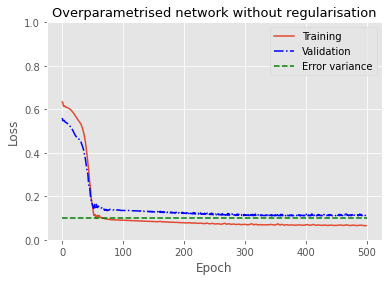

In [ ]:
plt.plot(train.history["loss"], label="Training")
plt.plot(train.history["val_loss"], "b-.", label="Validation")
plt.plot([0,500], [var,var], "g--", label="Error variance")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Overparametrised network without regularisation", loc='center', fontsize=13)
plt.ylim(0,1)
plt.legend()
plt.show()

We note that $\textbf{training loss becomes lower than validation loss}$,

in fact lower than the model error variance 0.1.
This is a clear sign of $\textbf{overfitting}$.

Visual assessment confirms that this is indeed true.

32/32 [==============================] - 0s 11ms/step


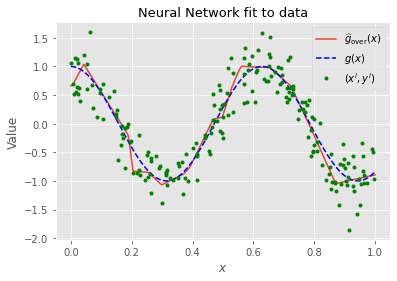

In [ ]:
y_hat = g_hat_over.predict(x_grid)
plt.plot(x_grid, y_hat, label=r"$\widehat{g}_{\mathrm{over}}(x)$")
plt.plot(x_grid, g_grid, "b--", label="$g(x)$")
plt.plot(x_sub, y_sub, "go", markersize=3, label="$(x^i,y^i)$")
plt.xlabel("$x$")
plt.ylabel("Value")
plt.title("Neural Network fit to data", loc='center', fontsize=13)
plt.legend()
plt.show()

Now we apply a regularisation method called dropout. In a dropout layer, inputs

 are randomly replaced by zeros with fixed probability
$p \in (0,1)$ at each step of the training.

Non-zero inputs are scaled by
$\frac{1}{1-p}$ to retain the original magnitude of the sum of inputs.

We introduce a dropout layer with dropout probability
$p=0.4$ after each hidden layer:

In [ ]:
g_hat_dropout = keras.Sequential([
    keras.layers.InputLayer(input_shape=(1,)),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation="linear")
]
)
g_hat_dropout.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1000)              2000      
                                                                 
 dropout_6 (Dropout)         (None, 1000)              0         
                                                                 
 dense_17 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_7 (Dropout)         (None, 1000)              0         
                                                                 
 dense_18 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_8 (Dropout)         (None, 1000)              0         
                                                                 
 dense_19 (Dense)            (None, 1)                

We compile and train the newtowrk $\hat{g}_{dropout}$ with other settings unchanged.

In [ ]:
g_hat_dropout.compile(optimizer="adam", loss="mean_squared_error")
train = g_hat_dropout.fit(x_sub, y_sub, batch_size=100, epochs=500, validation_split=0.5)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.6459 - val_loss: 0.5484
Epoch 2/500
1/1 [==============================] - 0s 90ms/step - loss: 0.6182 - val_loss: 0.5532
Epoch 3/500
1/1 [==============================] - 0s 92ms/step - loss: 0.6250 - val_loss: 0.5478
Epoch 4/500
1/1 [==============================] - 0s 96ms/step - loss: 0.6230 - val_loss: 0.5445
Epoch 5/500
1/1 [==============================] - 0s 92ms/step - loss: 0.6151 - val_loss: 0.5486
Epoch 6/500
1/1 [==============================] - 0s 96ms/step - loss: 0.6197 - val_loss: 0.5497
Epoch 7/500
1/1 [==============================] - 0s 95ms/step - loss: 0.6134 - val_loss: 0.5447
Epoch 8/500
1/1 [==============================] - 0s 94ms/step - loss: 0.6256 - val_loss: 0.5405
Epoch 9/500
1/1 [==============================] - 0s 93ms/step - loss: 0.6149 - val_loss: 0.5387
Epoch 10/500
1/1 [==============================] - 0s 89ms/step - loss: 0.6049 - val_loss: 0.5380
Epoch 11/500
1/1 [===

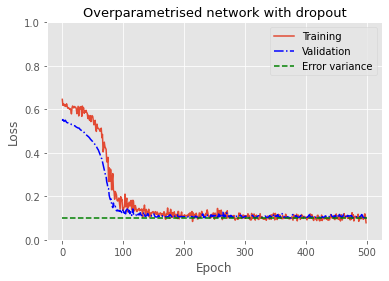

In [ ]:
plt.plot(train.history["loss"], label="Training")
plt.plot(train.history["val_loss"], "b-.", label="Validation")
plt.plot([0,500], [var,var], "g--", label="Error variance")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Overparametrised network with dropout", loc='center', fontsize=13)
plt.ylim(0,1)
plt.show()

We do not see a major discrepancy between training and validation losses.

Also training loss tends to stay above the model error variance
0.1.  Let us visually study the fit.

32/32 [==============================] - 0s 10ms/step


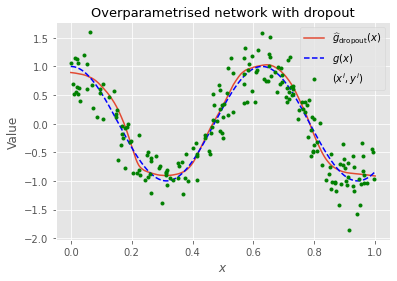

In [ ]:
y_hat = g_hat_dropout.predict(x_grid)
plt.plot(x_grid, y_hat, label=r"$\widehat{g}_{\mathrm{dropout}}(x)$")
plt.plot(x_grid, g_grid, "b--", label="$g(x)$")
plt.plot(x_sub, y_sub, "go", markersize=3, label="$(x^i,y^i)$")
plt.xlabel("$x$")
plt.ylabel("Value")
plt.title("Overparametrised network with dropout", loc='center', fontsize=13)
plt.legend()
plt.show()

32/32 [==============================] - 0s 1ms/step


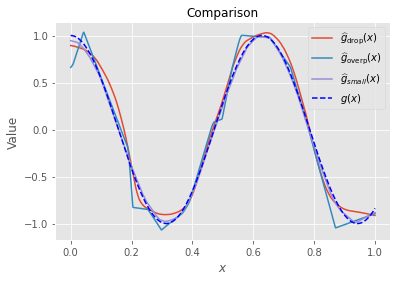

In [ ]:
y_hat = g_hat_dropout.predict(x_grid)
y_hat_none = g_hat_over.predict(x_grid)
y_hat_small = g_hat.predict(x_grid)
plt.plot(x_grid, y_hat, label=r"$\widehat{g}_{\mathrm{drop}}(x)$")
plt.plot(x_grid, y_hat_none, label=r"$\widehat{g}_{\mathrm{overp}}(x)$")
plt.plot(x_grid, y_hat_small, label=r"$\widehat{g}_{small}(x)$")
plt.plot(x_grid, g_grid, "b--", label="$g(x)$")
#plt.plot(x_sub, y_sub, "go", markersize=3, label="$(x^i,y^i)$")
plt.xlabel("$x$")
plt.ylabel("Value")
plt.title("Comparison", loc='center', fontsize=12)
plt.legend()
plt.show()

While the fit is not perfect (due to the small amount of samples), the overfitting problem has been mitigated.

# Session 4

To install keras tuner for Hyperparameter Tuning you need to do the following:

In [ ]:
%pip install -q -U keras-tuner

In [ ]:
import keras_tuner as kt

In [ ]:
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer  = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

# Using TensorBoard for Visualization:
To add tensorboard you need to do the following:

In [ ]:
%pip install -q -U tensorboard-plugin-profile

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()  # e.g., my_logs/run_2022_08_01_17_25_59

In [ ]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
#history = model.fit([...], callbacks=[tensorboard_cb])

## Session 5

Deep Hedging

In [ ]:
import numpy as np
import numpy.random as npr
from scipy.stats import norm
import tensorflow.keras as keras
import tensorflow.keras.backend as kb
import matplotlib.pyplot as plt
plt.style.use('ggplot')

We define auxiliary functions related to the Black-Scholes model,

computing call option prices and delta under the model.

In [ ]:
def BlackScholesCall(S0,r,sigma,T,K):
    d1 =  1 / (sigma * np.sqrt(T)) * (np.log(S0/K) + (r+sigma**2/2)*T)
    d2 = d1 - sigma * np.sqrt(T)
    return norm.cdf(d1) * S0 - norm.cdf(d2) * K * np.exp(-r*T)
def BlackScholesCallDelta(S0,r,sigma,T,K):
    d1 =  1 / (sigma * np.sqrt(T)) * (np.log(S0/K) + (r+sigma**2/2)*T)
    return norm.cdf(d1)

Next, we set the parameter values:

In [ ]:
mu = 0.1
sigma = 0.5
T = 100
S_0 = 1

We generate $N$ independent samples $S^0, S^1, \ldots, S^{N-1}$ of the

price path $S=(S_t)_{t\leq T}$ and store them in an $N\times (T+1)$ array.

In [ ]:
npr.seed(12345)
N = 100000
xi = npr.normal(0, np.sqrt(1 / T), (N, T))
W = np.apply_along_axis(np.cumsum, 1, xi)
W = np.concatenate((np.zeros((N, 1)), W),1)
drift = np.linspace(0, mu , T + 1)
drift = np.reshape(drift, (1, T + 1))
drift = np.repeat(drift, N, axis=0)
S = S_0 * np.exp(drift + sigma * W)

For future use in training, we compute an $N×T$ array dS containing differenced prices.

In [ ]:
dS = np.diff(S, 1, 1)

In [ ]:
Ti = np.tile(np.linspace(0, 1, T+1)[0:T], (N, 1))
X = np.stack([Ti, S[:,0:T]], axis=-1)

Before proceeding further, it is useful to plot a couple of price paths in our data set.

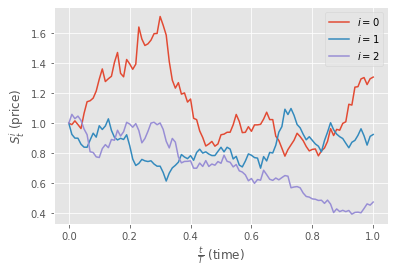

In [ ]:
tim = np.linspace(0,1,T+1)
plt.plot(tim,S[0],label="$i=0$")
plt.plot(tim,S[1],label="$i=1$")
plt.plot(tim,S[2],label="$i=2$")
plt.xlabel(r"$\frac{t}{T}$ (time)")
plt.ylabel(r"$S^i_t$ (price)")
plt.legend()
plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100, 100)          300       
                                                                 
 dense_7 (Dense)             (None, 100, 100)          10100     
                                                                 
 dense_8 (Dense)             (None, 100, 100)          10100     
                                                                 
 dense_9 (Dense)             (None, 100, 1)            101       
                                                                 
Total params: 20,601
Trainable params: 20,601
Non-trainable params: 0
_________________________________________________________________


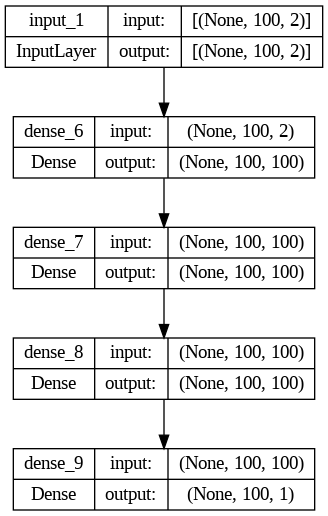

In [ ]:
f = keras.Sequential([
    keras.layers.InputLayer(input_shape=(T, 2)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
f.summary()
keras.utils.plot_model(f, show_shapes=True)

In [ ]:
K = 1
callprice = BlackScholesCall(S_0, 0, sigma, 1, K)
def loss_call(y_true,y_pred):
    return (callprice + kb.sum(y_pred * y_true, axis=-1) - kb.maximum(S_0 + kb.sum(y_true, axis=-1) - K,0.))**2

In [ ]:
epochs = 4
f.compile(optimizer='adam', loss=loss_call)
f.fit(X, dS, batch_size=100, epochs=epochs)

Epoch 1/4
1000/1000 [==============================] - 54s 53ms/step - loss: 0.0015
Epoch 2/4
1000/1000 [==============================] - 63s 63ms/step - loss: 3.4197e-04
Epoch 3/4
1000/1000 [==============================] - 58s 58ms/step - loss: 3.3137e-04
Epoch 4/4
1000/1000 [==============================] - 55s 55ms/step - loss: 3.2690e-04


1/1 [==============================] - 0s 225ms/step


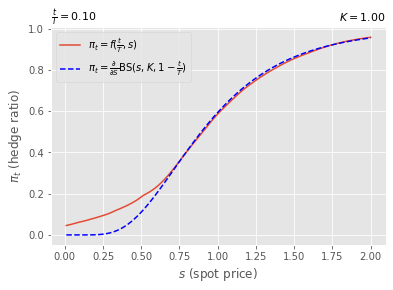

1/1 [==============================] - 0s 26ms/step


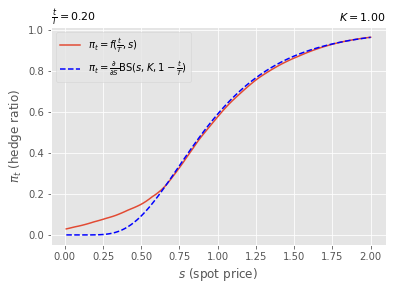

1/1 [==============================] - 0s 24ms/step


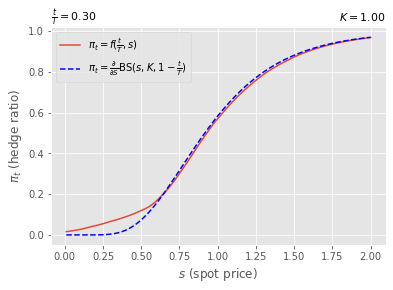

1/1 [==============================] - 0s 27ms/step


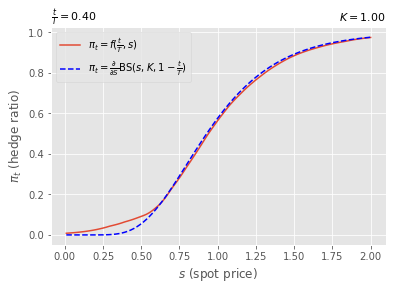

1/1 [==============================] - 0s 26ms/step


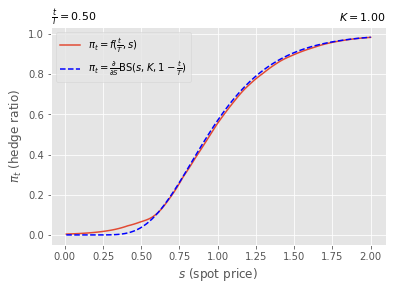

1/1 [==============================] - 0s 31ms/step


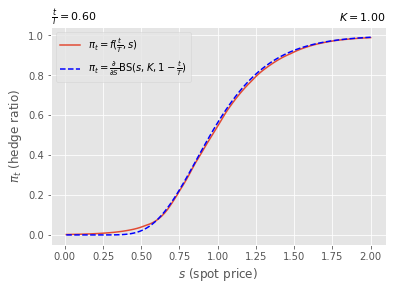

1/1 [==============================] - 0s 51ms/step


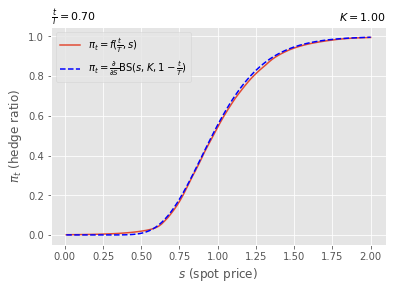

1/1 [==============================] - 0s 49ms/step


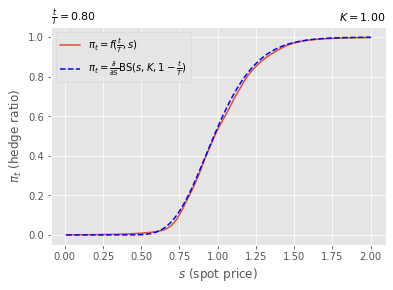

1/1 [==============================] - 0s 52ms/step


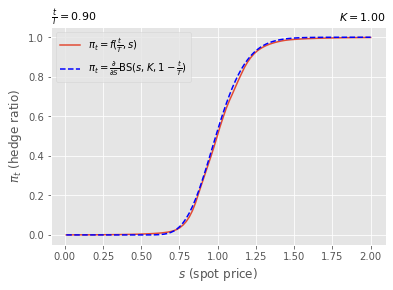

In [ ]:
for t in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    Spr = np.linspace(0.01, 2, num=100)
    Xpr = np.stack([np.reshape(np.repeat(t, 100), (1,100)), np.reshape(Spr, (1,100))], axis=-1)
    Delta_learn = np.reshape(f.predict(Xpr), (100,))
    Delta_BS = BlackScholesCallDelta(Spr, 0, sigma, 1-t, K)
    plt.plot(Spr, Delta_learn, label=r"$\pi_t=f(\frac{t}{T},s)$")
    plt.plot(Spr, Delta_BS, "b--", label=r"$\pi_t=\frac{\partial}{\partial S}\mathrm{BS}(s,K,1-\frac{t}{T})$")
    plt.xlabel(r"$s$ (spot price)")
    plt.ylabel(r"$\pi_t$ (hedge ratio)")
    plt.title(r'$\frac{t}{T}=$%1.2f' % t, loc='left', fontsize=11)
    plt.title(r'$K=$%1.2f' % K, loc='right', fontsize=11)
    plt.legend()
    plt.show()

In [ ]:
import tensorflow as tf

encoder = tf.keras.Sequential([tf.keras.layers.Dense(2)])
decoder = tf.keras.Sequential([tf.keras.layers.Dense(3)])
autoencoder = tf.keras.Sequential([encoder, decoder])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
autoencoder.compile(loss="mse", optimizer=optimizer)

## Session 7


In [ ]:
import numpy as np
import torch
import torch.nn as nn

This code is an altertative to the code presented in the github repository of the Conditional Variational Autoencoder presented in Session 7.

First we set up a neural network for the (conditional) VAE.

Autoencoders can be thought of as compressed representators of data (think for example Principal Component Decomposition, Session 1).
The "Variational" nature of it allows us to sample from a random source and hence create "new" samples which are distributionally indistinguishable from the original dataset.

First we start with a simple visual example to demonstrate the working of a CVAE. Afterwards we proceed to learn a lognormal distribution (Black Scholes Model) with a CVAE, conditioned on its $\sigma$ parameter. The two experiments work independently from one another. No need to run one before the other.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
import torch
#from src.cvae_torch import CVAE
import importlib
from tqdm.notebook import tqdm

We create the data (two cirlces)

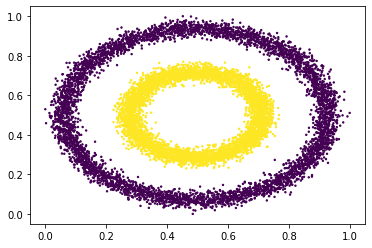

In [ ]:
data, conditions = make_circles(n_samples=10000, noise=0.05, factor=0.5)

# We normalise the data to [0, 1]^2
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Plot dataset
plt.scatter(*data.T, c=conditions, s=2)
plt.show()

We train the CVAE

In [ ]:
cvae = CVAE(input_dim=2, cond_dim=1, n_latent=4, alpha=0.02)

n_epoch = 20000
optimizer = torch.optim.Adam(cvae.parameters(), lr=1e-3)
X = torch.tensor(data.astype('float32'))
cond = torch.tensor(conditions.astype('float32')).reshape(-1, 1)
for epoch in tqdm(range(1, n_epoch + 1)):
    optimizer.zero_grad()
    loss = cvae(X, cond)
    loss.backward()
    optimizer.step()

    if epoch == 1 or epoch % 1000 == 0:
        print(epoch, loss.item())

  0%|          | 0/20000 [00:00<?, ?it/s]

1 0.3013276159763336
1000 0.021054796874523163
2000 0.019253535196185112
3000 0.01847752183675766
4000 0.018014485016465187
5000 0.017648614943027496
6000 0.017735041677951813
7000 0.017544111236929893
8000 0.017250921577215195
9000 0.017287718132138252
10000 0.017250128090381622
11000 0.017171453684568405
12000 0.01710900291800499
13000 0.017111893743276596
14000 0.017210304737091064
15000 0.017185073345899582
16000 0.01694178767502308
17000 0.016964592039585114
18000 0.01689082756638527
19000 0.016943279653787613
20000 0.016899945214390755


Finally we generate samples using the CVAE:

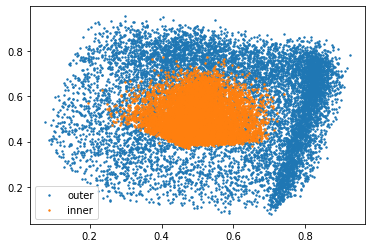

In [ ]:
outer_circle_generated = cvae.generate(0., n_samples=10000).detach().numpy()
inner_circle_generated = cvae.generate(1., n_samples=10000).detach().numpy()

plt.scatter(*outer_circle_generated.T, s=2, label='outer')
plt.scatter(*inner_circle_generated.T, s=2, label='inner')
plt.legend()
plt.show()

***************************************************************

In [ ]:
class Encoder(nn.Module):
    '''
    Encoder of CVAE, which is a two-layer fully connected NN.
    '''
    def __init__(self, input_dim, cond_dim, hidden_dim, n_latent):
        '''
        input_dim:  dim of the real data (S_t), which is 1 in our case
        cond_dim:   dim of the condition (sigma), which is 1 in our case
        hidden_dim: # of hidden neurons of the NN
        n_latent:   # of Gaussian latent variables, which is set to 8 in our case, the same as the original author
        '''
        super().__init__()
        self.hidden = nn.Linear(input_dim + cond_dim, hidden_dim)  # the dimension here is "input_dim + cond_dim" since we need to concat the input data and the condition together.
        self.mu = nn.Linear(hidden_dim, n_latent)
        self.log_sigma = nn.Linear(hidden_dim, n_latent)
        self.act = nn.LeakyReLU(negative_slope=0.3)  # the activation function is exactly the same as the original author
        self.norm = torch.distributions.Normal(loc=0, scale=1)  # standard normal distribution which we will draw samples from

    def forward(self, X, cond):
        X = torch.concat([X, cond], axis=1)  # concat the input data and condition together
        X = self.act(self.hidden(X))
        mu = self.mu(X)
        sigma = torch.exp(self.log_sigma(X))  # to keep sigma positive, we take exp
        samples = mu + sigma * self.norm.sample(sample_shape=mu.shape)  # draw samples from N(mu, sig^2)
        return mu, sigma, samples


In [ ]:
class Decoder(nn.Module):
    '''
    Decoder of the CVAE, which is a two-layer fully connected NN.
    '''
    def __init__(self, n_latent, cond_dim, hidden_dim, output_dim):
        '''
        n_latent:   # of Gaussian latent variables, which is the same as encoder
        cond_dim:   dim of the condition (sigma), which is the same as encoder
        hidden_dim: # of hidden neurons of the NN
        output_dim: dim of output, which should be the same as "input_dim" of encoder
        '''
        super().__init__()
        self.hidden = nn.Linear(n_latent + cond_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)
        self.act = nn.LeakyReLU(negative_slope=0.3)  # the activation function is exactly the same as the original author

    def forward(self, samples, cond):
        X = torch.concat([samples, cond], axis=1)  # we need to concat samples drawn from N(mu, sig^2) (or N(0, 1)) with condition together
        X = self.act(self.hidden(X))
        output = self.output(X)
        return output


In [ ]:
class CVAE(nn.Module):
    '''
    The full CVAE that incorporates the above encoder and decoder.
    '''
    def __init__(self, input_dim, cond_dim, n_latent, hidden_dim=50, alpha=0.2):
        '''
        hidden_dim: exactly the same as the original author
        alpha: related to the weights of MSE loss and KL divergence loss, the default value is set to the same of the original author.
               In practice we need to adjusted it manually (finally set to 2e-3, again the same as the original author).
        '''
        super().__init__()
        self.encoder = Encoder(input_dim, cond_dim, hidden_dim, n_latent)
        self.denoder = Decoder(n_latent, cond_dim, hidden_dim, input_dim)
        self.n_latent = n_latent
        self.alpha = alpha
        # self.loss_fn = nn.MSELoss()
        self.loss_fn = nn.HuberLoss(delta=0.5)  # HuberLoss with hyperparameter delta = 0.5, 0.5 is chosen subjectively. PyTorch's default delta = 1 won't work in our case because our regularized data all lie in [0, 1]

    def forward(self, X, cond):
        mu, sigma, samples = self.encoder(X, cond)  # samples are drawn from N(mu, sig^2)
        output = self.denoder(samples, cond)
        mse_loss = self.loss_fn(output, X)  # difference between input data and output data
        kl_loss = -1 / 2 * (1 + torch.log(sigma) - mu**2 - sigma)  # KL divergence between N(mu, sig^2) and N(0, 1)
        kl_loss = kl_loss.sum(axis=1).mean(axis=0)
        loss = (1 - self.alpha) * mse_loss + self.alpha * kl_loss  # weighted sum of MSE loss and KL divergence loss
        return loss

    def generate(self, cond, n_samples):
        norm = self.encoder.norm.sample(sample_shape=[n_samples, self.n_latent])  # when generating new data, sample from N(0, 1)
        cond = torch.ones([n_samples, 1]) * cond  # broadcast the condition to match the shape of N(0, 1) samples
        generated = self.denoder(norm, cond)
        return generated

Now we use this to generate a lognormal distribution using a variational autoencoder.

In [ ]:
import numpy as np
import torch
import torch.nn as nn
#from src.cvae_torch import CVAE
import scipy.stats as stats
from scipy.stats import kstest
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

Experiment setup

Step 1: generate training data: (S_t, sigma)

Step 2: train CVAE (inilitialised above)

In [ ]:
# Step 0: experiment setup
S0 = 1
r = 0.05
sig_range = [0.05, 1]
t = 1

# Step 1: generate training data: (S_t, sigma)
np.random.seed(2023)
n_sig = 100
n_points = 2000
sig_train = np.linspace(sig_range[0], sig_range[1], n_sig)
St_train = []
for sig in sig_train:
    tmp = (S0 * np.exp(stats.norm.rvs(loc=(r - sig**2 / 2) * t,
                                      scale=sig * np.sqrt(t), size=n_points))).tolist()
    St_train += tmp
St_train = np.array(St_train).astype('float32')
sig_train = np.repeat(sig_train, n_points).astype('float32')

# Step 1.5: regularization
# censor
threshold = np.percentile(St_train, 99)
idx = np.where(St_train > threshold)[0]
St_train[idx] = threshold
# scale
M = St_train.max()
m = St_train.min()
St_train = (St_train - m) / (M - m)
# scaler = MinMaxScaler(feature_range=(0, 1))
# St_train = scaler.fit_transform(St_train.reshape(-1, 1)).squeeze()

# Step 2: train CVAE
cvae = CVAE(input_dim=1, cond_dim=1, n_latent=8, alpha=2e-3)

n_epoch = 20000
optimizer = torch.optim.Adam(cvae.parameters(), lr=1e-3)
batch_size = 10000
for epoch in tqdm(range(1, n_epoch + 1)):
    optimizer.zero_grad()
    idx = np.random.randint(low=0, high=len(St_train), size=batch_size)
    X = torch.from_numpy(St_train[idx]).reshape(-1, 1)
    cond = torch.from_numpy(sig_train[idx]).reshape(-1, 1)
    loss = cvae(X, cond)
    loss.backward()
    optimizer.step()

    if epoch == 1 or epoch % 1000 == 0:
        print(epoch, loss.item())

  0%|          | 0/20000 [00:00<?, ?it/s]

1 0.0930609256029129
1000 0.0021590422838926315
2000 0.0019343217136338353
3000 0.0018475842662155628
4000 0.0018059377325698733
5000 0.001767706242389977
6000 0.0017590245697647333
7000 0.00170290214009583
8000 0.0017227513017132878
9000 0.0017085029976442456
10000 0.0017124323640018702
11000 0.0017248978838324547
12000 0.001719163148663938
13000 0.0016980512300506234
14000 0.0017165995668619871
15000 0.0016992677701637149
16000 0.0016636739019304514
17000 0.001703308429569006
18000 0.0016854051500558853
19000 0.001711820950731635
20000 0.001683856826275587


 Step 3: generate new data and validate using Kolmogorov-Smirnov test

In [ ]:
n_iter = 100
sig_test = np.linspace(sig_range[0], sig_range[1], 200)
p_avg = np.zeros_like(sig_test)
n_points_test = 200
for _ in tqdm(range(n_iter)):
    for i, sig in enumerate(sig_test):
        real_samples = S0 * np.exp(stats.norm.rvs(loc=(r - sig**2 / 2) * t,
                                                  scale=sig * np.sqrt(t), size=n_points_test))
        real_samples = (real_samples - m) / (M - m)
        cvae_samples = cvae.generate(cond=sig, n_samples=n_points_test).detach().numpy().squeeze()
        res = kstest(real_samples, cvae_samples)
        p_avg[i] += res.pvalue
p_avg /= n_iter

for i, sig in enumerate(sig_test):
    print(f'sig={round(sig, 3)}, p-value={round(p_avg[i], 6)}')

  0%|          | 0/100 [00:00<?, ?it/s]

sig=0.05, p-value=5.4e-05
sig=0.055, p-value=2.2e-05
sig=0.06, p-value=0.0
sig=0.064, p-value=1e-06
sig=0.069, p-value=0.0
sig=0.074, p-value=2e-06
sig=0.079, p-value=3.5e-05
sig=0.083, p-value=0.000776
sig=0.088, p-value=0.007522
sig=0.093, p-value=0.025354
sig=0.098, p-value=0.05258
sig=0.103, p-value=0.106178
sig=0.107, p-value=0.135961
sig=0.112, p-value=0.190475
sig=0.117, p-value=0.243246
sig=0.122, p-value=0.261334
sig=0.126, p-value=0.255431
sig=0.131, p-value=0.271807
sig=0.136, p-value=0.264321
sig=0.141, p-value=0.29865
sig=0.145, p-value=0.247118
sig=0.15, p-value=0.27096
sig=0.155, p-value=0.289702
sig=0.16, p-value=0.241639
sig=0.165, p-value=0.219719
sig=0.169, p-value=0.204985
sig=0.174, p-value=0.217476
sig=0.179, p-value=0.227715
sig=0.184, p-value=0.229264
sig=0.188, p-value=0.179178
sig=0.193, p-value=0.164654
sig=0.198, p-value=0.205196
sig=0.203, p-value=0.142863
sig=0.208, p-value=0.171771
sig=0.212, p-value=0.176432
sig=0.217, p-value=0.149029
sig=0.222, p-value

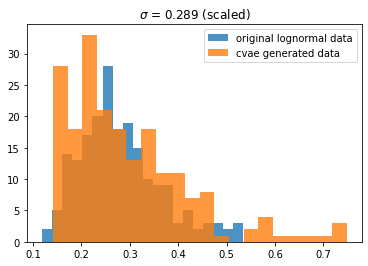

In [ ]:
i = int(n_sig / 2)
sig = sig_test[i]
real_samples = S0 * np.exp(stats.norm.rvs(loc=(r - sig**2 / 2) * t,
                                          scale=sig * np.sqrt(t), size=n_points_test))
real_samples = (real_samples - m) / (M - m)
cvae_samples = cvae.generate(cond=sig, n_samples=n_points_test).detach().numpy().squeeze()

plt.hist(real_samples, bins=20, label='original lognormal data', alpha=0.8)
plt.hist(cvae_samples, bins=20, label='cvae generated data' ,alpha=0.8)
plt.title(f'$\sigma$ = {round(sig, 3)} (scaled)')
plt.legend()
plt.show()

Session 8
March 21st, 2023

Principles of Reinforcement Learning:
Bandits

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

The multiarmed testbed

To roughly assess the relative effectiveness of the greedy and
$ϵ$-greedy methods, we compared them numerically on a suite of test problems. This was a set of 2000 randomly generated
$k$-armed bandit tasks with $k=10$. For each bandit, the action values $q_*(a)$, $a=1,…,10$ were selected according to a normal (Gaussian) distribution with mean 0 and variance 1. Then, when a learning method applied to that problem selected action $A_t$ at time step $t$, the actual reward, $R_t$ was selected from a normal distribution with mean $(A_t)q∗​(At​)$ and variance 1. We call this suite of test tasks the 10-armed testbed.

For any learning method, we can measure its performance and behaviour as it improves with experience over 1000 time steps when applied to one of the bandit problems. This makes up one run. Repeating this for 2000 independent runs, each with a different bandit problem, we obtained measures of the learning algorithm's average behaviour.

We use the class $\texttt{MultiArmedBanditProblem}$ to represent a single 10-armed bandit problem:



In [ ]:
class MultiArmedBanditProblem(object):
    def __init__(self, arm_count):
        self.__arm_count = arm_count
        self.__action_values = np.random.normal(size=arm_count)
        self.__optimal_actions = tuple(np.argwhere(self.__action_values == np.amax(self.__action_values)).flatten().tolist())

    def __my_private_method(self):
        pass

    @property
    def arm_count(self):
        print('The property getter has been called')
        return self.__arm_count

    @property
    def action_values(self):
        """
        The agent does not normally know what the action values are.
        This property was added to facilitate analytics.
        """
        return self.__action_values.copy()

    @property
    def optimal_actions(self):
        """
        The agent does not normally know what the optimal actions are.
        This property was added to facilitate analytics.
        """
        return self.__optimal_actions

    def sample(self, action):
        assert action >= 0 and action < self.__arm_count
        return np.random.normal(loc=self.action_values[action], scale=1.)

It is hepful to visualise this

In [ ]:
def visualise_multi_armed_bandit_problem(problem, samples_per_action=1000, figure=None, ax=None):
    if ax is None:
        if figure is None: figure = plt.figure()
        ax = figure.add_subplot(111)
    actions = []
    samples = []
    for action in range(multi_armed_bandit_problem.arm_count):
        for _ in range(samples_per_action):
            actions.append(action)
            samples.append(multi_armed_bandit_problem.sample(action))
    ax.plot(actions, samples, 'o', alpha=.1)

Let us create a signle 10-armed bandit problem:

In [ ]:
multi_armed_bandit_problem = MultiArmedBanditProblem(arm_count=10)

In [ ]:
multi_armed_bandit_problem.arm_count

The property getter has been called


10

In [ ]:
multi_armed_bandit_problem.optimal_actions

(7,)

In [ ]:
multi_armed_bandit_problem.sample(1)

-2.4828503482671573

The property getter has been called


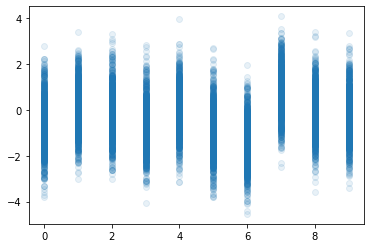

In [ ]:
visualise_multi_armed_bandit_problem(multi_armed_bandit_problem)

The class MultiarmedTestbed represents an entire testbed consisitng of a given number of problems all with the same arm count.

In [ ]:
class MultiArmedTestbed(object):
    def __init__(self, arm_count, problem_count):
        self.__problems = [MultiArmedBanditProblem(arm_count) for i in range(problem_count)]

    def __getitem__(self, index):
        return self.__problems[index]

    def __len__(self):
        return len(self.__problems)

Let us calculate a Multiarmedtestbed with 2000 10-armed bandit problems:

In [ ]:
testbed = MultiArmedTestbed(10, 2000)

The agent does not have access to the true action values, but we can inspect them for convenience. For example, for the first (0th) problem:

In [ ]:
testbed[0].action_values

array([ 0.18437409,  0.24954634, -1.52399342, -0.72638565,  0.12087357,
       -0.07435314, -1.99272524,  0.90524479, -2.40998607,  0.74299159])

In [ ]:
def greedy_strategy(problem, time_step_count):
    mean_rewards_per_time_step = []
    pct_times_optimal_action = []
    action_counts = [0 for i in range(problem.arm_count)]
    estimated_action_values = [0. for i in range(problem.arm_count)]
    for n in range(time_step_count):
        action = np.argmax(estimated_action_values)
        reward = problem.sample(action)
        mean_rewards_per_time_step.append(reward if len(mean_rewards_per_time_step) == 0 \
                else mean_rewards_per_time_step[-1] + (reward - mean_rewards_per_time_step[-1]) / (n+1))
        action_counts[action] += 1
        pct_times_optimal_action.append(sum([action_counts[i] for i in problem.optimal_actions]) / sum(action_counts))
        estimated_action_values[action] += 1. / action_counts[action] * (reward - estimated_action_values[action])
    return mean_rewards_per_time_step, pct_times_optimal_action

In [ ]:
def epsilon_greedy_strategy(problem, time_step_count, epsilon):
    mean_rewards_per_time_step = []
    pct_times_optimal_action = []
    action_counts = [0 for i in range(problem.arm_count)]
    estimated_action_values = [0. for i in range(problem.arm_count)]
    for n in range(time_step_count):
        action = np.random.randint(problem.arm_count) if np.random.random() <= epsilon else np.argmax(estimated_action_values)
        reward = problem.sample(action)
        mean_rewards_per_time_step.append(reward if len(mean_rewards_per_time_step) == 0 \
                else mean_rewards_per_time_step[-1] + (reward - mean_rewards_per_time_step[-1]) / (n+1))
        action_counts[action] += 1
        pct_times_optimal_action.append(sum([action_counts[i] for i in problem.optimal_actions]) / sum(action_counts))
        estimated_action_values[action] += 1. / action_counts[action] * (reward - estimated_action_values[action])
    return mean_rewards_per_time_step, pct_times_optimal_action

In [ ]:
mean_rewards_per_time_step, pct_times_optimal_action = greedy_strategy(testbed[0], 1000);

The property getter has been called
The property getter has been called


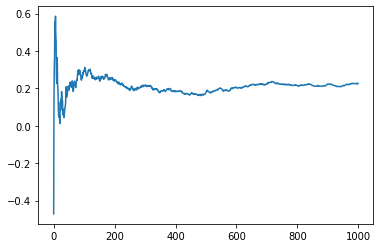

In [ ]:
plt.plot(mean_rewards_per_time_step);

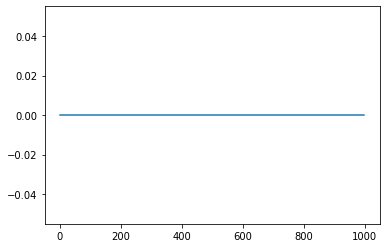

In [ ]:
plt.plot(pct_times_optimal_action);

However, we are interested in how the strategies perform on average. Repeating the above for 2000 independent runs, each with a different bandit problem, we obtained measures of the learning algorithm's average behaviour.

In [ ]:
mean_rewards_per_time_step_greedy = []
mean_rewards_per_time_step_epsilon_greedy_0_1 = []
mean_rewards_per_time_step_epsilon_greedy_0_01 = []
pct_times_optimal_action_greedy = []
pct_times_optimal_action_epsilon_greedy_0_1 = []
pct_times_optimal_action_epsilon_greedy_0_01 = []
for i in range(len(testbed)):
    mean_rewards_per_time_step, pct_times_optimal_action = greedy_strategy(testbed[i], 1000)
    mean_rewards_per_time_step_greedy.append(mean_rewards_per_time_step)
    pct_times_optimal_action_greedy.append(pct_times_optimal_action)
    mean_rewards_per_time_step, pct_times_optimal_action = epsilon_greedy_strategy(testbed[i], 1000, 0.1)
    mean_rewards_per_time_step_epsilon_greedy_0_1.append(mean_rewards_per_time_step)
    pct_times_optimal_action_epsilon_greedy_0_1.append(pct_times_optimal_action)
    mean_rewards_per_time_step, pct_times_optimal_action = epsilon_greedy_strategy(testbed[i], 1000, 0.01)
    mean_rewards_per_time_step_epsilon_greedy_0_01.append(mean_rewards_per_time_step)
    pct_times_optimal_action_epsilon_greedy_0_01.append(pct_times_optimal_action)
    if (i + 1) % 100 == 0: print('Processed %d problems out of %d' % (i + 1, len(testbed)))

Streaming output truncated to the last 5000 lines.
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property getter has been called
The property 

In [ ]:
mean_mean_rewards_per_time_step_greedy = np.mean(mean_rewards_per_time_step_greedy, axis=0)
mean_mean_rewards_per_time_step_epsilon_greedy_0_1 = np.mean(mean_rewards_per_time_step_epsilon_greedy_0_1, axis=0)
mean_mean_rewards_per_time_step_epsilon_greedy_0_01 = np.mean(mean_rewards_per_time_step_epsilon_greedy_0_01, axis=0)
mean_pct_times_optimal_action_greedy = np.mean(pct_times_optimal_action_greedy, axis=0)
mean_pct_times_optimal_action_epsilon_greedy_0_1 = np.mean(pct_times_optimal_action_epsilon_greedy_0_1, axis=0)
mean_pct_times_optimal_action_epsilon_greedy_0_01 = np.mean(pct_times_optimal_action_epsilon_greedy_0_01, axis=0)

The following plot compares a greedy method with two
$ϵ$-greedy methods ($ϵ=0.01$ and $ϵ=0.1$) on the $10$-armed testbed. All methods formed their action-value estimates using the sample-average technique. The graph shows the increase in expected reward with experience. The greedy method improved slightly faster than the other methods at the very beginning, but then levelled off at a lower level. The greedy method performs significantly worse in the long run because it often gets stuck performing suboptimal actions.

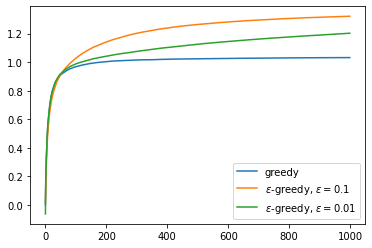

In [ ]:
plt.plot(mean_mean_rewards_per_time_step_greedy, label='greedy')
plt.plot(mean_mean_rewards_per_time_step_epsilon_greedy_0_1, label='$\epsilon$-greedy, $\epsilon = 0.1$')
plt.plot(mean_mean_rewards_per_time_step_epsilon_greedy_0_01, label='$\epsilon$-greedy, $\epsilon = 0.01$')
plt.legend();

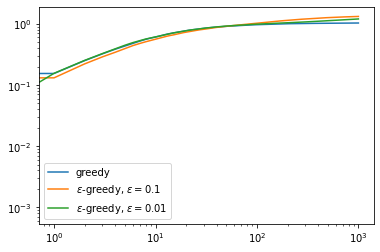

In [ ]:
plt.loglog(mean_mean_rewards_per_time_step_greedy, label='greedy')
plt.loglog(mean_mean_rewards_per_time_step_epsilon_greedy_0_1, label='$\epsilon$-greedy, $\epsilon = 0.1$')
plt.loglog(mean_mean_rewards_per_time_step_epsilon_greedy_0_01, label='$\epsilon$-greedy, $\epsilon = 0.01$')
plt.legend();

The following plot shows that the greedy method found the optimal action in only approximately one-third of the tasks. In the other two-thirds, its initial samples of the optimal action were disappointing, and it never returned to it. The $ϵ$-greedy methods eventually performed better because they continued to explore and to improve their chances of recognising the optimal action. The $
ϵ=0.1$ method explored more, and usually found the optimal action earlier, but it never selected that action more than 70% of the time. The
$ϵ
=
0.01$
 method improved more slowly, but eventually would perform better than the
$ϵ
=
0.1$ method on both performance measures. It is also possible to reduce
$ϵ$ over time to try to get the best of both high and low values.

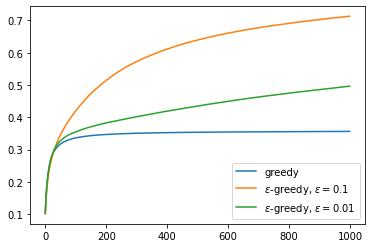

In [ ]:
plt.plot(mean_pct_times_optimal_action_greedy, label='greedy')
plt.plot(mean_pct_times_optimal_action_epsilon_greedy_0_1, label='$\epsilon$-greedy, $\epsilon = 0.1$')
plt.plot(mean_pct_times_optimal_action_epsilon_greedy_0_01, label='$\epsilon$-greedy, $\epsilon = 0.01$')
plt.legend();

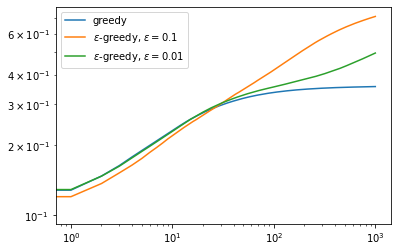

In [ ]:
plt.loglog(mean_pct_times_optimal_action_greedy, label='greedy')
plt.loglog(mean_pct_times_optimal_action_epsilon_greedy_0_1, label='$\epsilon$-greedy, $\epsilon = 0.1$')
plt.loglog(mean_pct_times_optimal_action_epsilon_greedy_0_01, label='$\epsilon$-greedy, $\epsilon = 0.01$')
plt.legend();